In [26]:
# load needed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

In [27]:
#mount drive - so it can pull data from there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#absolute path
path_train = '/content/drive/MyDrive/Colab_Notebooks/Final_Project/train.csv'
interviewData = pd.read_csv (path_train, index_col='HHX')

#absolute path
path_test = '/content/drive/MyDrive/Colab_Notebooks/Final_Project/test.csv'
interviewData_test = pd.read_csv (path_test, index_col='HHX')

In [29]:
#look at data
#interviewData

In [30]:
#Using Gabby's code to remove all columns with NANs.
#Because the data has been processed, the result should be 100%
interview_noNANs = interviewData.dropna(axis=1)
noNanColsPer = len(interview_noNANs.columns)/len(interviewData.columns)
print('We have ', len(interview_noNANs.columns), ' columns left, i.e. ', len(interview_noNANs.columns)/len(interviewData.columns)*100, '%')

We have  230  columns left, i.e.  100.0 %


In [31]:
# Import data
data_train = interviewData.dropna(axis=1)
data_test = interviewData_test.dropna(axis=1)

Y_train = data_train.loc[:,'PHQCAT_A'].to_numpy()
X_train = data_train.drop(['PHQCAT_A'], axis=1).to_numpy()


Y_test = data_test.loc[:,'PHQCAT_A'].to_numpy()
X_test = data_test.drop(['PHQCAT_A'], axis=1).to_numpy()



In [32]:
print("Training x:", X_train.shape,"Y:", Y_train.shape)

Training x: (19412, 229) Y: (19412,)


In [33]:
print("Testing x:", X_test.shape,"Y:", Y_test.shape)

Testing x: (4854, 229) Y: (4854,)


In [34]:
DTC = DecisionTreeClassifier()
scores = cross_val_score(DTC , X_train, Y_train, cv=10, scoring = 'roc_auc_ovr_weighted')
print(scores)
print (np.std (scores))


[0.80972313 0.82214191 0.81401521 0.83164596 0.83770222 0.8262595
 0.83286981 0.82874792 0.83137839 0.82581419]
0.008222169181812462


In [35]:
DTC.fit(X_train, Y_train)

DecisionTreeClassifier()

In [36]:
roc_auc_test = roc_auc_score(Y_test, DTC.predict_proba(X_test), multi_class='ovr', average='weighted')
roc_auc_test

0.8293182304017169

0.8293182304017169


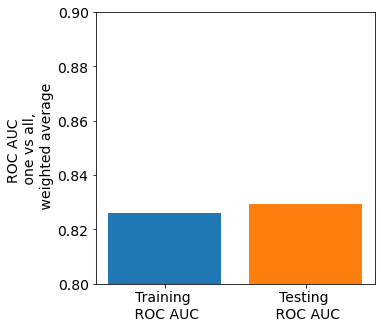

In [37]:
print(roc_auc_test)
#plot scores
fig, ax = plt.subplots(figsize = (5, 5))
#training score mean w/ sem
ax.bar(1, np.mean(scores))
ax.errorbar(1, np.std(scores))
#testing score
ax.bar(2, roc_auc_test)
ax.set_ylabel('ROC AUC \n one vs all, \n weighted average', fontsize = 14)
ax.set_ylim(bottom = 0.8, top = 0.9)

ax.set_xticks([1, 2])
ax.set_xticklabels (['Training \n ROC AUC', 'Testing \n ROC AUC'], fontsize = 14)

plt.yticks(fontsize = 14)

plt.show()

In [38]:
print("accuracy: ", DTC.score(X_test, Y_test))

accuracy:  0.8599093531108364


In [39]:
print('Score:', DTC.score(X_test, Y_test))
print('Predicted value:', DTC.predict(X_test[10].reshape(1, -1)))
print('Actual value:', Y_test[11])
print(metrics.classification_report(Y_test, DTC.predict(X_test)))

Score: 0.8599093531108364
Predicted value: [1]
Actual value: 1
              precision    recall  f1-score   support

           1       0.95      0.95      0.95      3947
           2       0.52      0.50      0.51       599
           3       0.30      0.31      0.30       180
           4       0.55      0.56      0.56       128

    accuracy                           0.86      4854
   macro avg       0.58      0.58      0.58      4854
weighted avg       0.86      0.86      0.86      4854



In [40]:
# # Visual decision tree
# plt.figure(figsize=(500,300))  # set plot size (denoted in inches)
# tree.plot_tree(DTC,filled=True, fontsize=8);
# plt.show()
